In [44]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [10]:
default = pd.read_excel('./corona_tested_individuals_ver_006.english.xlsx')
default.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


### Data Preparation

In [11]:
# Dummy variables. Base values: female, other_education, not_married
default['contact_with_cofirmed'] = (default['test_indication'] == 'Contact with confirmed').astype('int')
default['abroad'] = (default['test_indication'] =='Abroad').astype('int')
default['other'] = (default['test_indication'] == 'Other').astype('int')
default['male'] = (default['gender']== 'male').astype('int')
default['result'] = (default['corona_result']== 'positive').astype('int')
default.drop(['gender','test_indication', 'corona_result'], axis=1, inplace=True)

In [12]:
default.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,contact_with_cofirmed,abroad,other,male,result
0,2020-04-30,0,0,0,0,0,None,0,0,1,0,0
1,2020-04-30,1,0,0,0,0,None,0,0,1,0,0
2,2020-04-30,0,1,0,0,0,None,0,0,1,1,0
3,2020-04-30,1,0,0,0,0,None,0,0,1,0,0
4,2020-04-30,1,0,0,0,0,None,0,0,1,1,0


In [26]:
default.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'age_60_and_above', 'contact_with_cofirmed', 'abroad',
       'other', 'male', 'result'],
      dtype='object')

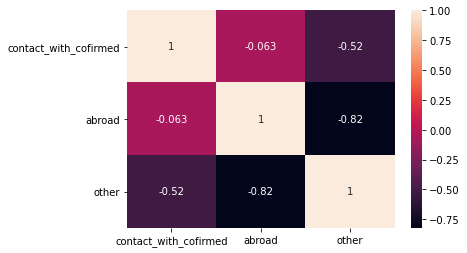

In [27]:
df_small = default.iloc[:,:10]
corr_mat = df_small.corr()

sns.heatmap(corr_mat, annot = True)
plt.show()

In [39]:
# Prepare Data
target_name = 'result'
topp_features = ['cough','fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'contact_with_cofirmed', 'abroad']
X = default[topp_features]
y = default[target_name]

In [46]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=55, stratify=y)

In [47]:
#Building  Modell
def CMatrix(CM, labels=['0','1']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

### Preparing a DataFrame for model analysis

In [48]:
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision' ,'recall'], 
                      columns=['LogisticReg', 'Bagging', 'RandomForest', 'Boosting'])

**In this application:**
- **Accuracy**: Overall how often the model predicts correctly negatives(0's) and positives (1's)
- **Precision**: When the model predicts **positives**: how often is correct?
- **Recall**: The proportion of **actual positives** that the model will correctly predict as such

#### False negatives are worse. It is when the model predicts a person has no cofid 19 but he/she is realy infected => look for a better recall

## A. Logistic Regression